In [3]:
import pickle
import numpy as np

In [4]:
with open ('train_qa-220120-145526.txt', 'rb') as fp:
    train_data = pickle.load(fp)

In [5]:
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [6]:
with open('test_qa-220120-145430.txt', 'rb') as fp:
    test_data = pickle.load(fp)

In [7]:
test_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [8]:
# Now we are going to do some data exploration
type(train_data), type(test_data)

(list, list)

In [9]:
len(train_data)

10000

In [10]:
len(test_data)

1000

In [11]:
# This will give the story, question and the answer
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [12]:
# This is the story or the situation
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [13]:
# Let us now see the question
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [14]:
# The answer for that would be
train_data[0][2]

'no'

## Setting up the vocabulary for all the words

In [15]:
# Vocab is a set
vocab = set()

In [16]:
all_data = test_data + train_data

In [17]:
type(all_data)

list

In [18]:
all_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [19]:
# Let us now unpack it
# For story, question and answer call the data
for story, question, answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [20]:
# Since the answers are mostly in yes or no
vocab.add('yes')
vocab.add('no')

In [21]:
len(vocab)

37

In [22]:
vocab_len = len(vocab) + 1

In [23]:
max_story_length = max(len(data[0]) for data in all_data)
print(max_story_length)

156


In [24]:
# Now we have to do the same thing for maximum length of the question
max_q_length = max(len(data[1]) for data in all_data)
print(max_q_length)

6


## Vectorization of the data

In [25]:
#!pip install keras

^C


In [26]:
#!pip install tensorflow

In [27]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

# At first let us create the object of the Tokenizer
tokenizer = Tokenizer(filters = [])

# Next fitting the vocabulary on tokenizer
tokenizer.fit_on_texts(vocab)

In [28]:
pip show tensorflow

Name: tensorflow
Version: 2.7.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: d:\users\kiit\anaconda3\lib\site-packagesNote: you may need to restart the kernel to use updated packages.

Requires: wrapt, gast, absl-py, tensorflow-io-gcs-filesystem, google-pasta, protobuf, keras, astunparse, grpcio, numpy, opt-einsum, keras-preprocessing, typing-extensions, flatbuffers, tensorboard, h5py, six, tensorflow-estimator, wheel, termcolor, libclang
Required-by: 


In [29]:
tokenizer.word_index

{'kitchen': 1,
 'yes': 2,
 'moved': 3,
 'picked': 4,
 'sandra': 5,
 'apple': 6,
 'daniel': 7,
 'mary': 8,
 'grabbed': 9,
 'journeyed': 10,
 'the': 11,
 'bathroom': 12,
 'went': 13,
 'in': 14,
 'took': 15,
 'up': 16,
 'back': 17,
 '.': 18,
 'discarded': 19,
 '?': 20,
 'milk': 21,
 'garden': 22,
 'office': 23,
 'put': 24,
 'no': 25,
 'left': 26,
 'bedroom': 27,
 'travelled': 28,
 'is': 29,
 'to': 30,
 'got': 31,
 'down': 32,
 'there': 33,
 'hallway': 34,
 'john': 35,
 'football': 36,
 'dropped': 37}

In [30]:
# Initializing the lists
train_story_text = []
train_q_text = []
train_answers = []

for story, question, answer in train_data:
    train_story_text.append(story)
    train_q_text.append(question)

In [31]:
# Next we are vectorizing
train_story_seq = tokenizer.texts_to_sequences(train_story_text)
train_q_seq = tokenizer.texts_to_sequences(train_q_text)

In [32]:
train_story_seq

[[8, 3, 30, 11, 12, 18, 5, 10, 30, 11, 27, 18],
 [8,
  3,
  30,
  11,
  12,
  18,
  5,
  10,
  30,
  11,
  27,
  18,
  8,
  13,
  17,
  30,
  11,
  27,
  18,
  7,
  13,
  17,
  30,
  11,
  34,
  18],
 [8,
  3,
  30,
  11,
  12,
  18,
  5,
  10,
  30,
  11,
  27,
  18,
  8,
  13,
  17,
  30,
  11,
  27,
  18,
  7,
  13,
  17,
  30,
  11,
  34,
  18,
  5,
  13,
  30,
  11,
  1,
  18,
  7,
  13,
  17,
  30,
  11,
  12,
  18],
 [8,
  3,
  30,
  11,
  12,
  18,
  5,
  10,
  30,
  11,
  27,
  18,
  8,
  13,
  17,
  30,
  11,
  27,
  18,
  7,
  13,
  17,
  30,
  11,
  34,
  18,
  5,
  13,
  30,
  11,
  1,
  18,
  7,
  13,
  17,
  30,
  11,
  12,
  18,
  7,
  4,
  16,
  11,
  36,
  33,
  18,
  7,
  13,
  30,
  11,
  27,
  18],
 [8,
  3,
  30,
  11,
  12,
  18,
  5,
  10,
  30,
  11,
  27,
  18,
  8,
  13,
  17,
  30,
  11,
  27,
  18,
  7,
  13,
  17,
  30,
  11,
  34,
  18,
  5,
  13,
  30,
  11,
  1,
  18,
  7,
  13,
  17,
  30,
  11,
  12,
  18,
  7,
  4,
  16,
  11,
  36,
  33,
  18,
  7,


In [33]:
train_q_seq

[[29, 5, 14, 11, 34, 20],
 [29, 7, 14, 11, 12, 20],
 [29, 7, 14, 11, 23, 20],
 [29, 7, 14, 11, 27, 20],
 [29, 7, 14, 11, 27, 20],
 [29, 8, 14, 11, 27, 20],
 [29, 5, 14, 11, 23, 20],
 [29, 5, 14, 11, 12, 20],
 [29, 5, 14, 11, 12, 20],
 [29, 8, 14, 11, 1, 20],
 [29, 5, 14, 11, 23, 20],
 [29, 8, 14, 11, 34, 20],
 [29, 8, 14, 11, 34, 20],
 [29, 8, 14, 11, 34, 20],
 [29, 8, 14, 11, 22, 20],
 [29, 5, 14, 11, 23, 20],
 [29, 5, 14, 11, 12, 20],
 [29, 5, 14, 11, 1, 20],
 [29, 8, 14, 11, 27, 20],
 [29, 8, 14, 11, 1, 20],
 [29, 7, 14, 11, 27, 20],
 [29, 5, 14, 11, 12, 20],
 [29, 5, 14, 11, 27, 20],
 [29, 7, 14, 11, 23, 20],
 [29, 7, 14, 11, 1, 20],
 [29, 5, 14, 11, 12, 20],
 [29, 5, 14, 11, 23, 20],
 [29, 35, 14, 11, 23, 20],
 [29, 5, 14, 11, 23, 20],
 [29, 5, 14, 11, 34, 20],
 [29, 35, 14, 11, 12, 20],
 [29, 35, 14, 11, 27, 20],
 [29, 8, 14, 11, 34, 20],
 [29, 35, 14, 11, 27, 20],
 [29, 7, 14, 11, 12, 20],
 [29, 5, 14, 11, 34, 20],
 [29, 8, 14, 11, 1, 20],
 [29, 8, 14, 11, 12, 20],
 [29, 5, 14, 

In [138]:
def vectorize_stories(data, word_index=tokenizer.word_index,
                     max_story_length=max_story_length, max_q_length=max_q_length):
    # The bot should take words from index dictionary from the tokenizer
    

# In X we are going to have the stories
# Xq we are going to have queries for the question
# Y we are going to have the answers for the questions

    X = []
    Xq = []
    Y = []

    for story, ques, ans in data:
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in ques]
        y = np.zeros(len(word_index) + 1)
        y[word_index[ans]]=1

        X.append(x)
        Xq.append(xq)
        Y.append(y)
    
    return(pad_sequences(X, maxlen=max_story_length),
          pad_sequences(Xq, maxlen=max_q_length),
          np.array(Y))

In [139]:
# Now let is vectorize the stories where we will send only the train data
inputs_train, queries_train, answer_train = vectorize_stories(train_data)

In [140]:
# Similarly, vectorizing the test data
inputs_test, queries_test, answer_test = vectorize_stories(test_data)

In [141]:
inputs_train

array([[ 0,  0,  0, ..., 11, 27, 18],
       [ 0,  0,  0, ..., 11, 34, 18],
       [ 0,  0,  0, ..., 11, 12, 18],
       ...,
       [ 0,  0,  0, ..., 11, 27, 18],
       [ 0,  0,  0, ..., 21, 33, 18],
       [ 0,  0,  0, ...,  6, 33, 18]])

In [142]:
inputs_test

array([[ 0,  0,  0, ..., 11, 27, 18],
       [ 0,  0,  0, ..., 11, 22, 18],
       [ 0,  0,  0, ..., 11, 22, 18],
       ...,
       [ 0,  0,  0, ..., 11,  6, 18],
       [ 0,  0,  0, ..., 11, 22, 18],
       [ 0,  0,  0, ...,  6, 33, 18]])

In [143]:
queries_train, answer_train

(array([[29,  5, 14, 11, 34, 20],
        [29,  7, 14, 11, 12, 20],
        [29,  7, 14, 11, 23, 20],
        ...,
        [29,  5, 14, 11, 34, 20],
        [29,  8, 14, 11,  1, 20],
        [29,  8, 14, 11, 27, 20]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]]))

In [144]:
# Just to verify
tokenizer.word_index['yes']

2

In [145]:
tokenizer.word_index["no"]

25

## Model building

In [146]:
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Dense, Permute, Dropout, add, dot, concatenate, LSTM, Input, Activation

In [147]:
# Now we require the placeholder for the inputs
Input_seq = Input((max_story_length,))
question = Input((max_q_length,))

In [148]:
# Now we import Input encoder m
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_len, output_dim=64))
input_encoder_m.add(Dropout(0.3))

In [149]:
# Importing Input encoder c
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_len, output_dim=max_q_length))
input_encoder_c.add(Dropout(0.3))

In [150]:
# Question encoder
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_len, output_dim=64, input_length=max_q_length))
question_encoder.add(Dropout(0.3))

In [151]:
# Encoding the sequences
input_encoded_m = input_encoder_m(Input_seq)
input_encoded_c = input_encoder_c(Input_seq)
question_encoded = question_encoder(question)

In [152]:
# Here, we are using the softmax function to match the dot products 
match = dot([input_encoded_m, question_encoded], axes=(2,2))
match = Activation('softmax')(match)

In [153]:
response = add([match, input_encoded_c])
response = Permute((2, 1))(response)

In [154]:
# Concetenation
answer = concatenate([response, question_encoded])

In [155]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate_2')>

## Applying LSTM
Full form: Long short term memory.

It is a special kind of RNN which has higher capability of storing previous information. 

In [156]:
# Applying the RNN
answer = LSTM(32)(answer)

In [157]:
# Now regularizing with the dropout
answer = Dropout(0.5)(answer)
answer = Dense(vocab_len)(answer)

In [158]:
answer = Activation('softmax')(answer)

In [159]:
# Now, building the final model
model = Model([Input_seq, question], answer)
# Compilation of all
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## Model summary

In [160]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential_9 (Sequential)      (None, None, 64)     2432        ['input_7[0][0]']                
                                                                                                  
 sequential_11 (Sequential)     (None, 6, 64)        2432        ['input_8[0][0]']                
                                                                                            

## Training the model

In [161]:
history = model.fit([inputs_train, queries_train], answer_train,
                   batch_size=32, epochs=20, 
                   validation_data=([inputs_test, queries_test], answer_test)
                   )

Epoch 1/20
313/313 [==============================] - 10s 22ms/step - loss: 0.9120 - accuracy: 0.4950 - val_loss: 0.6949 - val_accuracy: 0.4970
Epoch 2/20
313/313 [==============================] - 6s 20ms/step - loss: 0.7021 - accuracy: 0.5107 - val_loss: 0.6937 - val_accuracy: 0.4970
Epoch 3/20
313/313 [==============================] - 6s 20ms/step - loss: 0.6971 - accuracy: 0.5029 - val_loss: 0.6956 - val_accuracy: 0.4970
Epoch 4/20
313/313 [==============================] - 7s 21ms/step - loss: 0.6956 - accuracy: 0.4984 - val_loss: 0.6973 - val_accuracy: 0.4970
Epoch 5/20
313/313 [==============================] - 7s 21ms/step - loss: 0.6949 - accuracy: 0.4966 - val_loss: 0.6946 - val_accuracy: 0.5030
Epoch 6/20
313/313 [==============================] - 6s 21ms/step - loss: 0.6949 - accuracy: 0.4974 - val_loss: 0.6935 - val_accuracy: 0.4970
Epoch 7/20
313/313 [==============================] - 7s 21ms/step - loss: 0.6946 - accuracy: 0.4894 - val_loss: 0.6934 - val_accuracy: 0.498

## Evaluating the model

In [162]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Accuracy')

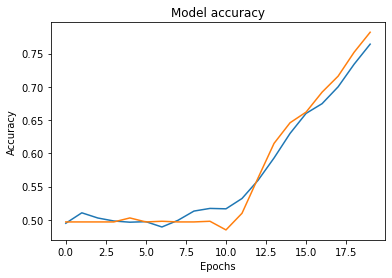

In [163]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [164]:
# Saving this model
model.save("chatbot_model")

INFO:tensorflow:Assets written to: chatbot_model\assets


INFO:tensorflow:Assets written to: chatbot_model\assets
D:\Users\KIIT\anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\Users\KIIT\anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [165]:
# Evaluation on the given test set
model.load_weights("chatbot_model")

In [166]:
pred_results = model.predict([inputs_test, queries_test])

In [167]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [168]:
story = ' '.join(word for word in test_data[13][0])

In [169]:
story

'John moved to the hallway . Sandra went to the bedroom . Sandra travelled to the garden . John got the football there . Daniel went back to the bedroom . Mary moved to the bathroom . Mary went to the kitchen . Sandra went to the hallway .'

In [170]:
query = ' '.join(word for word in test_data[13][1])
query

'Is Mary in the kitchen ?'

In [171]:
test_data[13][2]

'yes'

In [172]:
# Let us now generate predictions from the model
val_max = np.argmax(pred_results[13])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainity: ", pred_results[13][val_max])

Predicted answer is:  no
Probability of certainity:  0.5946661


In [173]:
story = ' '.join(word for word in test_data[23][0])
story

'Daniel grabbed the apple there . Mary travelled to the bedroom . Sandra got the milk there . Daniel moved to the hallway . Daniel moved to the bathroom . Mary took the football there . Daniel discarded the apple . Sandra journeyed to the hallway .'

In [174]:
query = ' '.join(word for word in test_data[23][1])
query

'Is Sandra in the bedroom ?'

In [175]:
test_data[23][2]

'no'

In [176]:
# Now, we can create the story by ourselves:
story = "Mary dropped the football . Sandra discarded apple in the kitchen ."
story.split()

['Mary',
 'dropped',
 'the',
 'football',
 '.',
 'Sandra',
 'discarded',
 'apple',
 'in',
 'the',
 'kitchen',
 '.']

In [182]:
my_question = "Is the apple in the kitchen ?"
my_question.split()

['Is', 'the', 'apple', 'in', 'the', 'kitchen', '?']

In [178]:
my_data = [(story.split(), my_question.split(), 'yes')]

In [179]:
my_story, my_ques, my_ans = vectorize_stories(my_data)

In [180]:
pred_results = model.predict([my_story, my_ques])

In [181]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainity: ", pred_results[0][val_max])

Predicted answer is:  yes
Probability of certainity:  0.8827621


So this was all about creating the chatbot. 